### <font color="cobalt">Exercises</font>

<u>**Exercise #1**</u>

In this exercise you'll model a carbon monoxide (CO) molecule's vibrations.  As for CO<sub>2</sub>, the mass of the oxygen atom is $29200 \, m_e$ and that of carbon is $21900 \, m_e$.  The equilibrium bond length is a little smaller than for $\mathsf{CO_2}$, here it's $2.14 \, a_o$, but the spring constant is larger, $1.27 \, E_h/a_o^2$.  Create a modified version of the `setupCO2` function to use these values to model and plot the vibrations of the C and O atoms if they're displaced $2.0 \, a_o$ from their equilibrium positions in opposite directions.  Comment on the reasonableness of the oscillation period and the amplitudes, as compared with the plot for $\mathsf{CO_2}$.  Determine analytically what the ratio of amplitudes should be, and compare with the numerical value.  Do the two values agree?

In [1]:
%matplotlib inline
from matplotlib.pyplot import plot, xlabel, ylabel
import numpy as np

In [2]:
class Balls():
    def __init__ (self, x, v, m, nextx=0, nextv=0):
        self.m = m
        self.x = x
        self.v = v
        self.nextx = x        # to store new position
        self.nextv = v        # to store new velocity
        self.springs = []
        self.otherballs = []
    
    def nextPos(self, dt): 
        F = 0 
        for i in range(len(self.otherballs)):
            length = self.dist(self.otherballs[i])        # now called as method on "self"
            direction = self.fsign(self.otherballs[i])    # now called as method on "self"
            F = F - direction * self.springs[i].K * (length - self.springs[i].L0) 
        a = F / self.m
        self.nextv = self.nextv + a * dt            # compute new position
        self.nextx = self.nextx + self.nextv * dt   # compute new velocity
       
    def move(self):
        self.x = self.nextx     # update position
        self.v = self.nextv     # update velocity
        
    def dist(self, otherball):   # changed generic "ball1" & "ball2" to "self" & "otherball"
        from math import sqrt
        deltax = self.x - otherball.x
        deltay = 0
        return sqrt(deltax**2 + deltay**2)

    def fsign(self, otherball):  # changed generic "ball1" & "ball2" to "self" & "otherball"
        from numpy import sign
        return sign(self.x - otherball.x)

class Spring():
    def __init__ (self, L0, K):
        self.L0 = L0   # rest length
        self.K = K     # spring constant
        
def moveAll(balls, dt, tf):
    '''Move a set of balls (input as a list) 
    from t = 0 to t = tf using a time step of dt.'''
    
    from numpy import array
    
    num = len(balls)
    bx = [[] for i in range(num)]   # create empty list of list of ball positions; 
                                    # each list holds the positions for one ball
    time = []
    t = 0.

    while t < tf:
        # Find the new positions of all of the balls
        for i in range(num): 
            balls[i].nextPos(dt)
            
        # We move the balls after computing all of their positions
        for j in range(num):
            balls[j].move()
            bx[j].append(balls[j].x)
            
        time.append(t)
        t = t + dt
        
    return time, bx

In [3]:
def setupCO(nballs, nsprings):
    '''Create lists of ball and spring instances, 
    and connect them to each other, to model the 
    vibration of a (linear) CO2 molecule.'''
    
    # Create list of ball instances
    b = []
    b.append(Balls(1., 0.0, 29200))
    b.append(Balls(-1., 0.0, 21900))
#   b.append(Balls(-2.2, 0.0, 29200))

    # Create list of (identical) spring instances
    s = []
    for i in range(nsprings):
        s.append(Spring(2.14, 1.27))

    # Connect springs to balls
    for i in range(nballs):
        for j in range(nsprings):
            if ((j == i) or (i-j == 1)):  # balls connect only to neighboring springs
                b[i].springs.append(s[j])

    # Connect each ball to the others
    for i in range(nballs):
        for j in range(nballs):
            if abs(j - i) == 1:   # ensures that each ball is connected only to nearest neighbors
                b[i].otherballs.append(b[j])
    
    return b, s

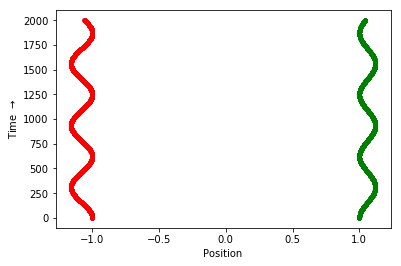

In [4]:
b, s = setupCO(2,1)
times, ballpos = moveAll(b, 0.1, 2000)

plot(ballpos[0], times, 'g.')
plot(ballpos[1], times, 'r.')
ylabel("Time $\\rightarrow$")
xlabel("Position")

In [5]:
(max(ballpos[0])-min(ballpos[0]))/(max(ballpos[1])-min(ballpos[1]))

0.75000000000008138

In [6]:
219./292

0.75

In [7]:
(1.27/(1/21900.+1/29200.)**(-1))**(-1/2)*2*np.pi

623.7076070512173